<a href="https://colab.research.google.com/github/hws2002/Deep_Learning_with_Keras/blob/main/Chapter5/Chapter5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 잡음 섞인 데이터

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random( (len(train_images), 784))], axis = 1
)

train_images_with_zero_channels = np.concatenate(
    [train_images, np.zeros( (len(train_images), 784))], axis = 1
)


In [6]:
from tensorflow import keras
from keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation = "relu"),
      layers.Dense(10, activation = "softmax"),
  ])

  model.compile(optimizer = "rmsprop",
                loss = "sparse_categorical_crossentropy",
                metrics = ['accuracy'])
  return model

model = get_model()
history_noise = model.fit(
  train_images_with_noise_channels,
  train_labels,
  epochs = 10,
  validation_split = 0.2
 )

model = get_model()
history_zeros = model.fit(
  train_images_with_zero_channels,
  train_labels,
  epochs = 10,
  validation_split = 0.2
 )

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7821 - loss: 0.7240 - val_accuracy: 0.9438 - val_loss: 0.1937
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.9392 - loss: 0.1916 - val_accuracy: 0.9570 - val_loss: 0.1540
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9602 - loss: 0.1264 - val_accuracy: 0.9573 - val_loss: 0.1451
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9730 - loss: 0.0899 - val_accuracy: 0.9551 - val_loss: 0.1649
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.9793 - loss: 0.0645 - val_accuracy: 0.9501 - val_loss: 0.2250
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9833 - loss: 0.0530 - val_accuracy: 0.9612 - val_loss: 0.1743
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9878 - loss: 0.0380 - val_accuracy: 0.9590 - val_loss: 0.1974
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9890 -

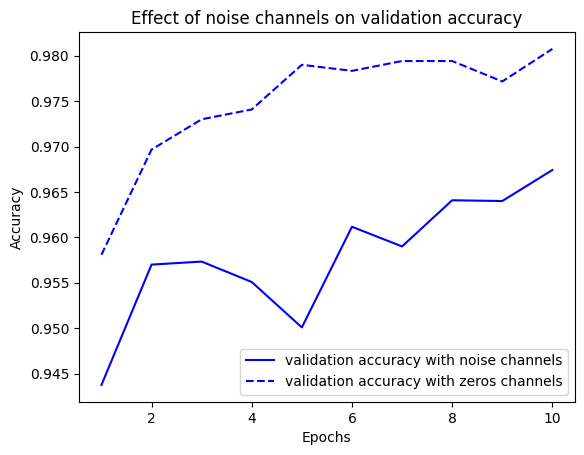

In [14]:
import matplotlib.pyplot as plt

val_loss_noise = history_noise.history['val_loss']

val_acc_noise = history_noise.history['val_accuracy']
val_loss_zeros = history_zeros.history['val_loss']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = len(val_acc_noise)
plt.plot(range(1, epochs+1), val_acc_noise, 'b-', label  = 'validation accuracy with noise channels')
plt.plot(range(1, epochs+1), val_acc_zeros, 'b--', label  = 'validation accuracy with zeros channels')

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 딥러닝에서 일반화의 본질

In [15]:
(train_images, train_labels), _ = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax"),
])

model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

model.fit(train_images,
          random_train_labels,
          epochs = 100,
          batch_size = 128,
          validation_split = 0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1071 - loss: 2.3297 - val_accuracy: 0.1028 - val_loss: 2.3058
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1169 - loss: 2.2977 - val_accuracy: 0.0942 - val_loss: 2.3118
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1334 - loss: 2.2877 - val_accuracy: 0.0996 - val_loss: 2.3163
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1472 - loss: 2.2730 - val_accuracy: 0.1016 - val_loss: 2.3229
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1549 - loss: 2.2577 - val_accuracy: 0.0989 - val_loss: 2.3396
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1710 - loss: 2.2370 - val_accuracy: 0.1066 - val_loss: 2.3515
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1844 - loss: 2.2103 - val_accuracy: 0.0978 - val_loss: 2.3735
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2061 - loss: 2.1815 - 

입력과 뒤섞은 레이블 사이에 아무런 관계가 없지만 비교적 작은 모델에서도 훈련 손실이 잘 감소함.  
당연히 이런 상황에서 가능한 일반화가 없기 때문에 검증 손실은 시간이 지남에 따라 향상되지 않음.